# <center> Tarea semanal 5</center>
### <center> Autores: Arturo Huber, Matias Galperin</center>

## Introducción Teórica

## Análisis y Desarrollo


In [1]:
import numpy as np
from scipy import signal as sig

import matplotlib.pyplot as plt
   
import scipy.io as sio
from scipy.io.wavfile import write

from lectura_sigs import ecg_one_lead, fs_ecg, ppg, fs_ppg, fs_audio, wav_data

frecuencia baja: 0.00, frecuencia alta 22.77
ancho de banda 22.77


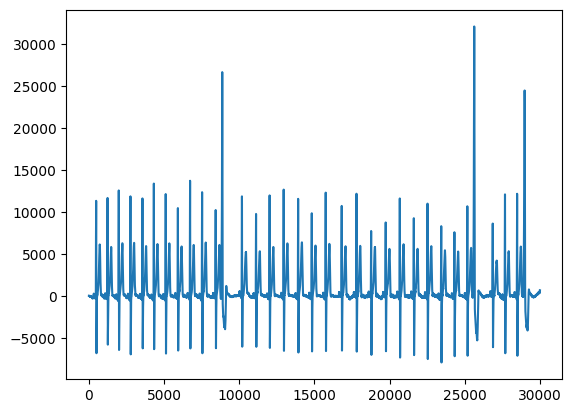

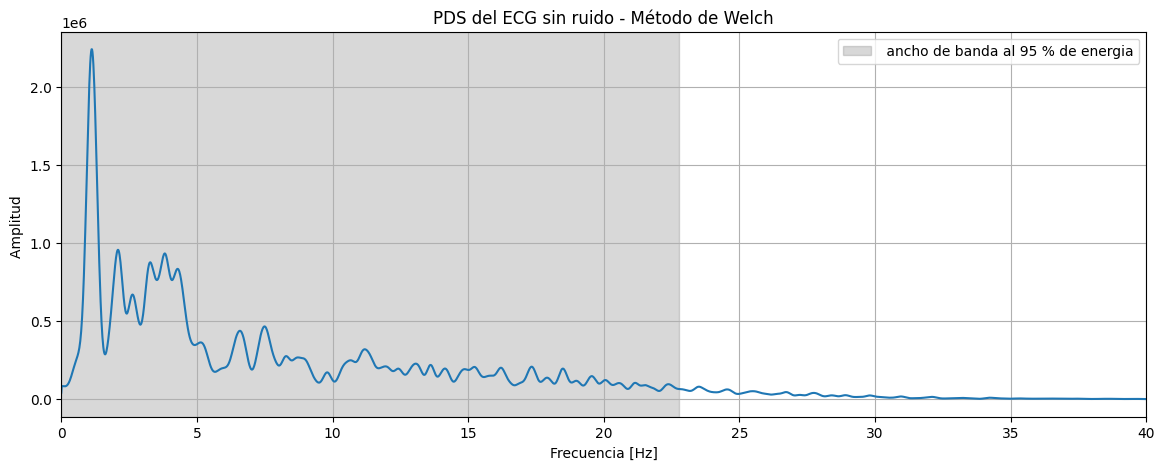

In [17]:
plt.figure()
plt.plot(ecg_one_lead)

N = len(ecg_one_lead)


cantidad_promedios = 7
nperseg = N // cantidad_promedios
f, Pxx = sig.welch(ecg_one_lead, fs=fs_ecg, nperseg = nperseg, window = 'hann', nfft = 2 * N)


total_power = np.sum(Pxx)
cumsum = np.cumsum(Pxx) / total_power

# niveles inferior y superior
percentil = 0.95
#low = (1 - percentil) / 2
low = 0
#high = 1 - low
high =  percentil


# buscar índices
indiceLow = np.searchsorted(cumsum, low)
indiceHigh = np.searchsorted(cumsum, high)

bandWith = f[indiceLow:indiceHigh]

print (f"frecuencia baja: {bandWith[0]:.2f}, frecuencia alta {bandWith[-1]:.2f}")
print (f"ancho de banda {bandWith[-1] - bandWith[0]:.2f}")

# Graficar
#ymin, ymax = plt.ylim()   # límites actuales del eje y

plt.figure(figsize=(14,5))
plt.plot(f, Pxx)
plt.title("PDS del ECG sin ruido - Método de Welch")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud ")
plt.xlim(0,40)
#plt.ylim(0,50)
plt.axvspan(bandWith[0], bandWith[-1],color = "grey", alpha=0.3, label = f" ancho de banda al {percentil *  100:.0f} % de energia")
plt.legend()
plt.grid(True)
plt.show()

frecuencia baja: 0.00, frecuencia alta 8.73
ancho de banda 8.73


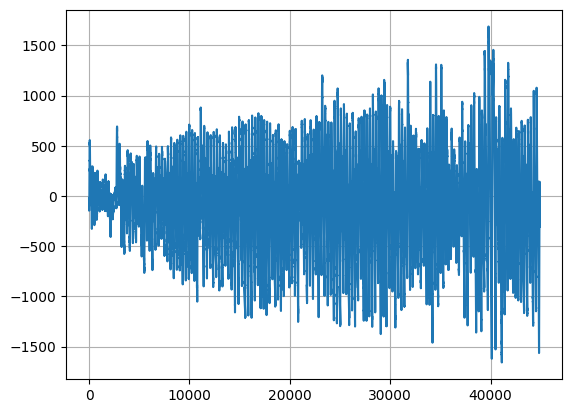

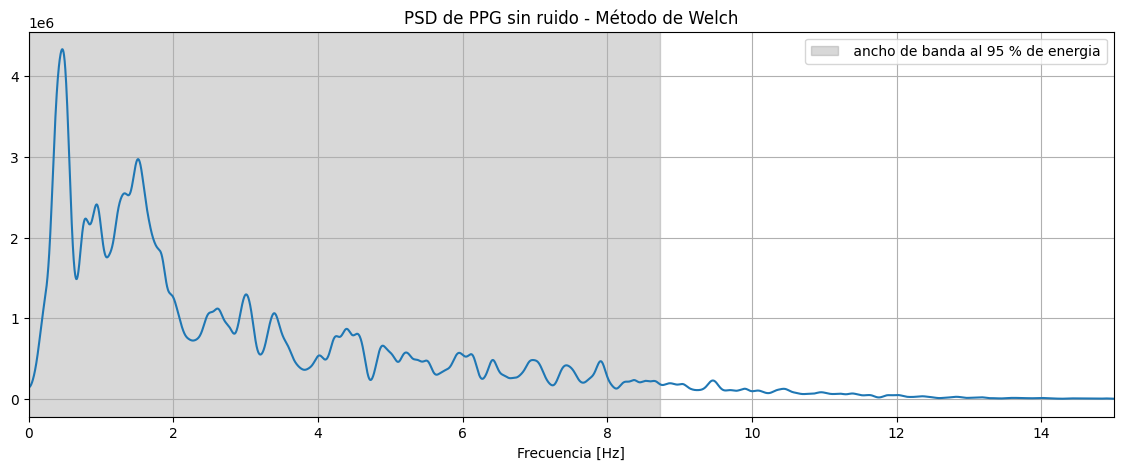

In [18]:
plt.figure()
plt.plot(ppg)
plt.grid(True)

N = len(ppg)
cantidad_promedios = 7
nperseg = N // cantidad_promedios
f, Pxx = sig.welch(ecg_one_lead, fs=fs_ppg, nperseg = nperseg, window = 'flattop', nfft = 3 * N)


total_power = np.sum(Pxx)
cumsum = np.cumsum(Pxx) / total_power

# niveles inferior y superior
percentil = 0.95
#low = (1 - percentil) / 2
#high = 1 - low
low = 0
high = percentil

# buscar índices
indiceLow = np.searchsorted(cumsum, low)
indiceHigh = np.searchsorted(cumsum, high)

bandWith = f[indiceLow:indiceHigh]

print (f"frecuencia baja: {bandWith[0]:.2f}, frecuencia alta {bandWith[-1]:.2f}")
print (f"ancho de banda {bandWith[-1] - bandWith[0]:.2f}")

# Graficar
ymin, ymax = plt.ylim()   # límites actuales del eje y

plt.figure(figsize=(14,5))
plt.plot(f, Pxx)   
plt.xlim(0,15)
plt.title("PSD de PPG sin ruido - Método de Welch")
plt.xlabel("Frecuencia [Hz]")
plt.axvspan(bandWith[0], bandWith[-1],color = "grey", alpha=0.3, label = f" ancho de banda al {percentil *  100:.0f} % de energia")
plt.legend()
plt.grid(True)
plt.show()

frecuencia baja: 46.25, frecuencia alta 1332.92
ancho de banda 1286.67


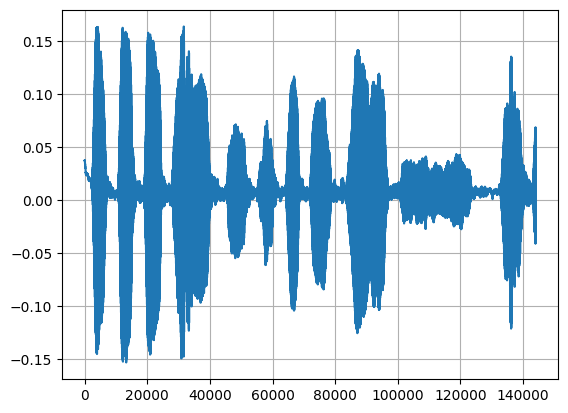

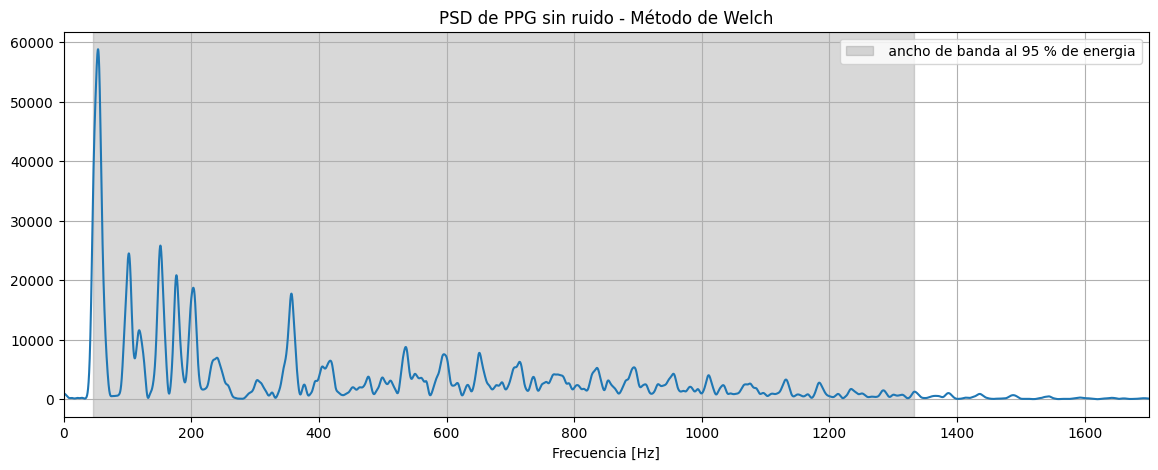

In [28]:
plt.figure()
plt.plot(wav_data)
plt.grid(True)


N = len(wav_data)
cantidad_promedios = 11
nperseg = N // cantidad_promedios
f, Pxx = sig.welch(ecg_one_lead, fs=fs_audio, nperseg = nperseg, window = 'flattop', nfft = 4 * N)


total_power = np.sum(Pxx)
cumsum = np.cumsum(Pxx) / total_power

# niveles inferior y superior
percentil = 0.95
low = (1 - percentil) / 2
high = 1 - low

# buscar índices
indiceLow = np.searchsorted(cumsum, low)
indiceHigh = np.searchsorted(cumsum, high)

bandWith = f[indiceLow:indiceHigh]

print (f"frecuencia baja: {bandWith[0]:.2f}, frecuencia alta {bandWith[-1]:.2f}")
print (f"ancho de banda {bandWith[-1] - bandWith[0]:.2f}")

# Graficar
ymin, ymax = plt.ylim()   # límites actuales del eje y

plt.figure(figsize=(14,5))
plt.plot(f, Pxx)   
plt.xlim(0,1700)
plt.title("PSD de PPG sin ruido - Método de Welch")
plt.xlabel("Frecuencia [Hz]")
plt.axvspan(bandWith[0], bandWith[-1],color = "grey", alpha=0.3, label = f" ancho de banda al {percentil *  100:.0f} % de energia")
plt.legend()
plt.grid(True)
plt.show()

##